In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Colab에 Mecab 설치 ( 형태소 분석기 Mecab )
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 44.5 MB/s 
     |████████████████████████████████| 86 kB 7.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-12 11:53:01--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 헬스 프로틴 리뷰 데이터 정제

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Study/NLP/KUBIG-실습/5주차/hellene.csv')

In [ ]:
df.head()

,Unnamed: 0,post
0,0,ㅇㅇ
1,1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
2,2,어쩐지 마싯더라 - dc official App
3,3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App
4,4,?


In [ ]:
del df['Unnamed: 0']

In [ ]:
df['reviews']=df['post']

In [ ]:
del df['post']
df

,reviews
0,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
2,어쩐지 마싯더라 - dc official App
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App
4,?
...,...
526,김종국이 모델인 단백질쉐이크 하나 사다가 먹었는데 이거 살 많이 찐다 그러고멸치들...
527,NaN
528,편의점 프로틴 먹는데 좀 비싸서 오래 먹기 좀 그런데
529,군대 와서 일병 오늘 달고 슬슬 운동좀 해볼려 하는데 선임분들 보니까 다들 프로틴 ...


In [ ]:
df['reviews'].nunique()

43

In [ ]:
df.drop_duplicates(subset=['reviews'],inplace=True)
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 44


In [ ]:
print(df.isnull().values.any())
df.dropna()

True


,reviews
0,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
2,어쩐지 마싯더라 - dc official App
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App
4,?
7,오늘도 근육조지자잉 - dc official App
8,컴뱃 초콜릿만 먹어왔는데마프 한번 도전해보려고
10,시바 컴뱃 2스쿱 한 방에 몰아먹었는데이러면 안 되겠노
11,하루에ㅔ
12,하루 한끼 라면 두개 개꿀 ㅋ나머지 프로틴 ㅋ


In [ ]:
df['reviews']=df['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['reviews'].replace('',np.nan,inplace=True)
print(df.isnull().sum())

reviews    2
dtype: int64


In [ ]:
df.isnull().values.any()

True

In [ ]:
df=df.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(df))

전처리 후 테스트용 샘플의 개수 : 42


In [ ]:
mecab=Mecab()
for i in range(5):
  try:
    print(mecab.morphs(df['reviews'][i]))
  except:
    pass

['ㅇㅇ']
['틱톡', '추천인', '만', '원', '에', '산다', '번', '만', '더', '하', '면', '번다', '무', '야호']
['어쩐지', '마', '싯', '더라']
['우유', '없', '어서', '사이다', '에', '타', '먹', '었', '는데', '초코', '사이다', '맛나', '고', '좋', '네']


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/mymodel/model.h5')

In [ ]:
stopwords = ['ㅇㅇ', '도','는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
df['tokenized']=df['reviews'].apply(mecab.morphs)
df['tokenized']=df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['tokenized']

0                                                    []
1            [틱톡, 추천인, 만, 원, 산다, 번, 만, 더, 면, 번다, 무, 야호]
2                                       [어쩐지, 마, 싯, 더라]
3         [우유, 없, 어서, 사이다, 타, 먹, 었, 는데, 초코, 사이다, 맛나, 좋]
7                                    [오늘, 근육, 조지, 자, 잉]
8      [컴뱃, 초콜릿, 만, 먹, 어, 왔, 는데, 마, 프, 번, 도전, 해, 보, 려고]
10    [시바, 컴뱃, 스쿱, 방, 몰, 아, 먹, 었, 는데, 이러, 면, 안, 되, 겠...
11                                              [하루, ㅔ]
12              [하루, 끼, 라면, 두, 개, 개꿀, ㅋ, 나머지, 프로, 틴, ㅋ]
13                                [우리, 나라, 회사, 뭐, 있, 음]
14    [원래, 프로, 틴, 스쿱, 끽, 먹, 는데, 프로, 틴, 바, 먹, 거, 랑, 하...
15         [주, 정도, 걸리, 나마, 프, 번, 안, 먹, 어, 봐서, 모르, 겠, 어]
16    [크레아틴, 사, 돈, 좀, 주세요, 프로, 틴, 사, 돈, 좀, 주세요, 무릎, ...
17    [배송, 비, 만, 원, 개오, 반데, 나, 랑, 공구, ㄱ, ㄱ, 필요, 거, 나...
19    [원래, 보통, 사람, 먹, 프로, 틴, 먹, 다가, 엄무, 건강, 안, 좋, 다고...
21                                    [근디, 머, 성비, 좋, 냐]
22    [포도, 주스, 물, 프로, 틴, 해서, 먹, 어, 보, 려고, 데, 괜찮, 음, ...
23    [순서, 대로, 민초, 아이스크림, 초콜릿, 프로, 틴, 머핀, 성분, 보,

In [ ]:
df['tokenized'].values

array([list([]),
       list(['틱톡', '추천인', '만', '원', '산다', '번', '만', '더', '면', '번다', '무', '야호']),
       list(['어쩐지', '마', '싯', '더라']),
       list(['우유', '없', '어서', '사이다', '타', '먹', '었', '는데', '초코', '사이다', '맛나', '좋']),
       list(['오늘', '근육', '조지', '자', '잉']),
       list(['컴뱃', '초콜릿', '만', '먹', '어', '왔', '는데', '마', '프', '번', '도전', '해', '보', '려고']),
       list(['시바', '컴뱃', '스쿱', '방', '몰', '아', '먹', '었', '는데', '이러', '면', '안', '되', '겠', '노']),
       list(['하루', 'ㅔ']),
       list(['하루', '끼', '라면', '두', '개', '개꿀', 'ㅋ', '나머지', '프로', '틴', 'ㅋ']),
       list(['우리', '나라', '회사', '뭐', '있', '음']),
       list(['원래', '프로', '틴', '스쿱', '끽', '먹', '는데', '프로', '틴', '바', '먹', '거', '랑', '하루', '프로', '틴', '두스', '쿱', '먹', '거', '랑', '후자', '효과', '똑같', '음']),
       list(['주', '정도', '걸리', '나마', '프', '번', '안', '먹', '어', '봐서', '모르', '겠', '어']),
       list(['크레아틴', '사', '돈', '좀', '주세요', '프로', '틴', '사', '돈', '좀', '주세요', '무릎', '보호', '대', '사', '돈', '좀', '주세요', '크레아틴', '사', '돈', '좀', '주세요', '프로', '틴', '사', '돈',

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 정수 인코딩

In [ ]:
data=df['tokenized'].values

In [ ]:
data

array([list([]),
       list(['틱톡', '추천인', '만', '원', '산다', '번', '만', '더', '면', '번다', '무', '야호']),
       list(['어쩐지', '마', '싯', '더라']),
       list(['우유', '없', '어서', '사이다', '타', '먹', '었', '는데', '초코', '사이다', '맛나', '좋']),
       list(['오늘', '근육', '조지', '자', '잉']),
       list(['컴뱃', '초콜릿', '만', '먹', '어', '왔', '는데', '마', '프', '번', '도전', '해', '보', '려고']),
       list(['시바', '컴뱃', '스쿱', '방', '몰', '아', '먹', '었', '는데', '이러', '면', '안', '되', '겠', '노']),
       list(['하루', 'ㅔ']),
       list(['하루', '끼', '라면', '두', '개', '개꿀', 'ㅋ', '나머지', '프로', '틴', 'ㅋ']),
       list(['우리', '나라', '회사', '뭐', '있', '음']),
       list(['원래', '프로', '틴', '스쿱', '끽', '먹', '는데', '프로', '틴', '바', '먹', '거', '랑', '하루', '프로', '틴', '두스', '쿱', '먹', '거', '랑', '후자', '효과', '똑같', '음']),
       list(['주', '정도', '걸리', '나마', '프', '번', '안', '먹', '어', '봐서', '모르', '겠', '어']),
       list(['크레아틴', '사', '돈', '좀', '주세요', '프로', '틴', '사', '돈', '좀', '주세요', '무릎', '보호', '대', '사', '돈', '좀', '주세요', '크레아틴', '사', '돈', '좀', '주세요', '프로', '틴', '사', '돈',

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data) # 각 행에 토큰화를 수행
sequences=tokenizer.texts_to_sequences(data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [ ]:
sequences[:5]

[[],
 [240, 241, 18, 43, 242, 78, 18, 79, 31, 243, 107, 244],
 [245, 52, 246, 247],
 [108, 53, 80, 109, 54, 1, 81, 9, 248, 109, 249, 26],
 [110, 250, 251, 82, 252]]

In [ ]:
word_to_index=tokenizer.word_index
print(word_to_index)

{'먹': 1, '틴': 2, '프로': 3, '운동': 4, '안': 5, '거': 6, '사': 7, '닭': 8, '는데': 9, '좀': 10, '나': 11, '햇': 12, '반': 13, '음': 14, '랑': 15, '미': 16, '트리': 17, '만': 18, '서': 19, '어': 20, '되': 21, '개': 22, '주': 23, '돈': 24, '이거': 25, '좋': 26, '하루': 27, '로': 28, '식단': 29, '아침': 30, '면': 31, '해': 32, '있': 33, '쿱': 34, '주세요': 35, 'ㄱ': 36, '해서': 37, '데': 38, '키': 39, '기': 40, '분': 41, '소고기': 42, '원': 43, '보': 44, '정도': 45, '야': 46, '몸무게': 47, '전': 48, '유산소': 49, '웨이트': 50, '으면': 51, '마': 52, '없': 53, '타': 54, '겠': 55, '크레아틴': 56, '배송': 57, '필요': 58, '말': 59, '요': 60, '냐': 61, '물': 62, '골격근': 63, '점심': 64, '오후': 65, '끝': 66, '구': 67, '한수': 68, '뒤': 69, '위주': 70, '식사': 71, '고강': 72, '시간': 73, '인데': 74, '같': 75, '하나': 76, '해도': 77, '번': 78, '더': 79, '어서': 80, '었': 81, '자': 82, '초콜릿': 83, '려고': 84, '스쿱': 85, '아': 86, '뭐': 87, '원래': 88, '모르': 89, '사람': 90, '다가': 91, '단백질': 92, '시': 93, '괜찮': 94, '세요': 95, '야채': 96, '어야': 97, '여': 98, '그램': 99, '지금': 100, '편의점': 101, '시작': 102, '으면서': 103, '가격': 104, '은데': 

In [ ]:
word_count=tokenizer.word_counts.items()
print(word_count)

odict_items([('틱톡', 1), ('추천인', 1), ('만', 10), ('원', 5), ('산다', 1), ('번', 3), ('더', 3), ('면', 6), ('번다', 1), ('무', 2), ('야호', 1), ('어쩐지', 1), ('마', 4), ('싯', 1), ('더라', 1), ('우유', 2), ('없', 4), ('어서', 3), ('사이다', 2), ('타', 4), ('먹', 59), ('었', 3), ('는데', 16), ('초코', 1), ('맛나', 1), ('좋', 7), ('오늘', 2), ('근육', 1), ('조지', 1), ('자', 3), ('잉', 1), ('컴뱃', 2), ('초콜릿', 3), ('어', 8), ('왔', 1), ('프', 2), ('도전', 1), ('해', 6), ('보', 5), ('려고', 3), ('시바', 1), ('스쿱', 3), ('방', 1), ('몰', 1), ('아', 3), ('이러', 1), ('안', 19), ('되', 8), ('겠', 4), ('노', 2), ('하루', 7), ('ㅔ', 1), ('끼', 2), ('라면', 1), ('두', 1), ('개', 8), ('개꿀', 1), ('ㅋ', 2), ('나머지', 1), ('프로', 32), ('틴', 34), ('우리', 1), ('나라', 1), ('회사', 1), ('뭐', 3), ('있', 6), ('음', 13), ('원래', 3), ('끽', 1), ('바', 1), ('거', 18), ('랑', 12), ('두스', 1), ('쿱', 6), ('후자', 1), ('효과', 1), ('똑같', 1), ('주', 8), ('정도', 5), ('걸리', 1), ('나마', 1), ('봐서', 1), ('모르', 3), ('크레아틴', 4), ('사', 18), ('돈', 8), ('좀', 16), ('주세요', 6), ('무릎', 2), ('보호', 2), ('대', 2), ('배송', 4), ('

In [ ]:
# 빈도수가 1회 밖에 되지않는 단어들이 얼마나 존재하는지 확인.
threshold=2
total_cnt=len(word_to_index)
rare_cnt=0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq=0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq=0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 188
단어 집합(vocabulary)에서 희귀 단어의 비율: 44.02810304449648
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.435139573070607


In [ ]:
vocab_size = len(word_to_index) + 1 # 패딩을 위한 토큰인 0번 단어를 고려
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 428


메일의 최대 길이 : 118
메일의 평균 길이 : 29.000000


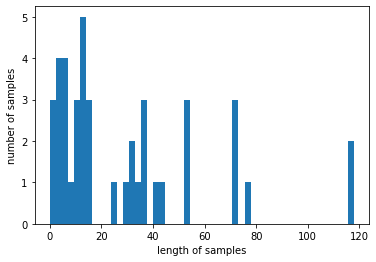

In [ ]:
# 메일 본문의 길이 분포
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len=118
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len) # X_data의 길이를 전부 118 로 바꾼다. 118보다 길이가 짧은 메일 샘플은 전부 숫자 0이 패딩되어 118의 길이를 가지게 된다.
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (42, 118)


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/mymodel/model.h5')

In [ ]:
loaded_model

In [38]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print('리뷰 :',new_sentence)
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))

    return 1
  else:
    print('리뷰 :',new_sentence)
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
    return -1

In [42]:
result=0
for i in range(len(df)):
  try:
    result+=sentiment_predict(df['reviews'][i])
  except:
    pass
print('-----------------------------------------------------------------------')
print('총 점수 :',result)
if result>0:
  print('제품에 대한 반응이 대체로 긍정적임.')
else:
  print('제품에 대한 반응이 대체로 부정적임.')

리뷰 : []
88.84% 확률로 부정 리뷰입니다.
리뷰 : ['틱톡', '추천인', '만', '원', '산다', '번', '만', '더', '면', '번다', '무', '야호']
90.58% 확률로 부정 리뷰입니다.
리뷰 : ['어쩐지', '마', '싯', '더라']
93.40% 확률로 긍정 리뷰입니다.
리뷰 : ['우유', '없', '어서', '사이다', '타', '먹', '었', '는데', '초코', '사이다', '맛나', '좋']
99.35% 확률로 부정 리뷰입니다.
리뷰 : ['오늘', '근육', '조지', '자', '잉']
95.79% 확률로 부정 리뷰입니다.
리뷰 : ['컴뱃', '초콜릿', '만', '먹', '어', '왔', '는데', '마', '프', '번', '도전', '해', '보', '려고']
99.05% 확률로 긍정 리뷰입니다.
리뷰 : ['시바', '컴뱃', '스쿱', '방', '몰', '아', '먹', '었', '는데', '이러', '면', '안', '되', '겠', '노']
75.47% 확률로 긍정 리뷰입니다.
리뷰 : ['하루', 'ㅔ']
65.36% 확률로 부정 리뷰입니다.
리뷰 : ['하루', '끼', '라면', '두', '개', '개꿀', 'ㅋ', '나머지', '프로', '틴', 'ㅋ']
75.57% 확률로 긍정 리뷰입니다.
리뷰 : ['우리', '나라', '회사', '뭐', '있', '음']
96.84% 확률로 부정 리뷰입니다.
리뷰 : ['원래', '프로', '틴', '스쿱', '끽', '먹', '는데', '프로', '틴', '바', '먹', '거', '랑', '하루', '프로', '틴', '두스', '쿱', '먹', '거', '랑', '후자', '효과', '똑같', '음']
98.09% 확률로 긍정 리뷰입니다.
리뷰 : ['주', '정도', '걸리', '나마', '프', '번', '안', '먹', '어', '봐서', '모르', '겠', '어']
82.27% 확률로 긍정 리뷰입니다.
리뷰 : ['크레아틴', '사', '돈